<a href="https://colab.research.google.com/github/ss20648/CE888/blob/main/Lab%208/Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os

# Unzip training data
from zipfile import ZipFile
file_name = "/content/data.zip"
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


In [3]:
# Make new base directory
original_dataset_dir = '/content/data'
base_dir = '/content/data_exp'
os.mkdir(base_dir)

base_dir_cat='/content/data/cats'
base_dir_dog='/content/data/dogs'
base_dir_human='/content/data/Humans'
base_dir_horse='/content/data/horses'

In [4]:
import shutil

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

fnames = ['cat.{}.jpg'.format(i) for i in range(1, 100)]
for fname in fnames:
    src = os.path.join(base_dir_cat, fname)
    dst = os.path.join(train_dir, fname)
    #print(src,dst)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(101, 150)]
for fname in fnames:
    src = os.path.join(base_dir_cat, fname)
    dst = os.path.join(validation_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(151, 202)]
for fname in fnames:
    src = os.path.join(base_dir_cat, fname)
    dst = os.path.join(test_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1, 100)]
for fname in fnames:
    src = os.path.join(base_dir_dog, fname)
    dst = os.path.join(train_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(101, 150)]
for fname in fnames:
    src = os.path.join(base_dir_dog, fname)
    dst = os.path.join(validation_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(151, 202)]
for fname in fnames:
    src = os.path.join(base_dir_dog, fname)
    dst = os.path.join(test_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['horse-{}.jpg'.format(i) for i in range(1, 100)]
for fname in fnames:
    src = os.path.join(base_dir_horse, fname)
    dst = os.path.join(train_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['horse-{}.jpg'.format(i) for i in range(101, 150)]
for fname in fnames:
    src = os.path.join(base_dir_horse, fname)
    dst = os.path.join(validation_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['horse-{}.jpg'.format(i) for i in range(151, 202)]
for fname in fnames:
    src = os.path.join(base_dir_horse, fname)
    dst = os.path.join(test_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['rider-{}.jpg'.format(i) for i in range(1, 100)]
for fname in fnames:
    src = os.path.join(base_dir_human, fname)
    dst = os.path.join(train_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['rider-{}.jpg'.format(i) for i in range(101, 150)]
for fname in fnames:
    src = os.path.join(base_dir_human, fname)
    dst = os.path.join(validation_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['rider-{}.jpg'.format(i) for i in range(151, 202)]
for fname in fnames:
    src = os.path.join(base_dir_human, fname)
    dst = os.path.join(test_dir, fname)
    shutil.copyfile(src, dst)

In [5]:
import cv2
import numpy as np
from random import shuffle

IMG_SIZE = 224
LR = 1e-4

In [6]:
def label_img(img):
    word_label = img.split('.')[0]
    if word_label == 'dog': return 1
    elif word_label == 'cat': return 0
    word_label = img.split('-')[0]
    if word_label == 'horse': return 2
    elif word_label == 'rider': return 3

def createDataSplitSet(datapath):
    X=[]
    y=[]

    for img in os.listdir(datapath):
        label = label_img(img)
        # print(label)
        path = os.path.join(datapath, img)
        image = cv2.resize(cv2.imread(path), (IMG_SIZE, IMG_SIZE))
        image = cv2.normalize(image, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

        X.append(np.array(image))
        y.append(label)

    return np.array(X), np.array(y)

In [7]:
train_X, train_y = createDataSplitSet(train_dir)
val_X, val_y = createDataSplitSet(validation_dir)
test_X, test_y = createDataSplitSet(test_dir)

In [8]:
x = np.array(train_y)
train_y_onehot = np.zeros((x.size, x.max()+1))
train_y_onehot[np.arange(x.size),x] = 1


x = np.array(val_y)
val_y_onehot = np.zeros((x.size, x.max()+1))
val_y_onehot[np.arange(x.size),x] = 1

x = np.array(test_y)
test_y_onehot = np.zeros((x.size, x.max()+1))
test_y_onehot[np.arange(x.size),x] = 1



# FE

In [9]:
## VGG 16
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Model

img_input = Input(shape=(IMG_SIZE, IMG_SIZE, 3))

In [10]:
model = VGG16(
    include_top=True,
    weights="imagenet",
    input_tensor=img_input,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax")
model.summary()

553467904/553467096 [==============================] - 3s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________________

In [11]:
last_layer = model.get_layer('fc2').output
out = Dense(4, activation='softmax', name='output')(last_layer)  ## 2 classes
model = Model(img_input, out)

for layer in model.layers[:-1]:
	layer.trainable = False

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [12]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
my_callbacks = [
    EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True),
    ModelCheckpoint(filepath='vgg16_model.h5', save_best_only=True),
]

In [13]:
history = model.fit(train_X, train_y_onehot,
                               batch_size=10,
                               epochs=10, 
                               validation_data=(val_X, val_y_onehot),
                               callbacks=my_callbacks)

Epoch 1/10
40/40 [==============================] - 40s 128ms/step - loss: 1.5668 - acc: 0.3540 - val_loss: 0.7086 - val_acc: 0.6786
Epoch 2/10
40/40 [==============================] - 3s 80ms/step - loss: 0.7166 - acc: 0.7092 - val_loss: 0.4949 - val_acc: 0.8418
Epoch 3/10
40/40 [==============================] - 3s 81ms/step - loss: 0.5119 - acc: 0.7914 - val_loss: 0.4610 - val_acc: 0.8571
Epoch 4/10
40/40 [==============================] - 3s 81ms/step - loss: 0.4190 - acc: 0.8574 - val_loss: 0.3446 - val_acc: 0.9133
Epoch 5/10
40/40 [==============================] - 3s 80ms/step - loss: 0.4537 - acc: 0.8155 - val_loss: 0.5667 - val_acc: 0.8010
Epoch 6/10
40/40 [==============================] - 3s 79ms/step - loss: 0.3863 - acc: 0.8663 - val_loss: 0.3480 - val_acc: 0.8827
Epoch 7/10
40/40 [==============================] - 3s 80ms/step - loss: 0.4266 - acc: 0.8286 - val_loss: 0.3872 - val_acc: 0.8520
Epoch 8/10
40/40 [==============================] - 3s 80ms/step - loss: 0.4114 -

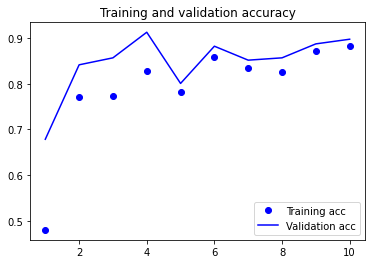

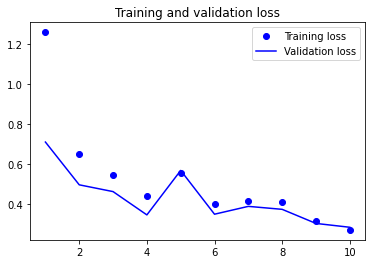

In [14]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [15]:
from sklearn.metrics import accuracy_score

## Test Accuracy
predictions = model.predict(test_X)
y_pred=[]
for i in range(len(predictions)):
  res=np.argmax(predictions[i])
  y_pred.append(res)
ypred=np.array(y_pred)

test_acc = accuracy_score(test_y, ypred)

from sklearn.metrics import precision_recall_fscore_support, roc_auc_score

precision, recall, f1score, _ = precision_recall_fscore_support(test_y, ypred, average='macro')


print("Train Accuracy:\t", acc[-1])
print("Val Accuracy:\t", val_acc[-1])
print("Test Accuracy:\t", test_acc)
print("Precision:\t", precision)
print("Recall:\t\t", recall)
print("F1 Score:\t", f1score)


Train Accuracy:	 0.8838383555412292
Val Accuracy:	 0.8979591727256775
Test Accuracy:	 0.8529411764705882
Precision:	 0.8757270283479961
Recall:		 0.8529411764705882
F1 Score:	 0.8474808960626641


# FT

In [16]:
## VGG 16
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Input, Flatten
from tensorflow.keras import Model

img_input = Input(shape=(IMG_SIZE, IMG_SIZE, 3))

In [17]:
model = VGG16(
    include_top=True,
    weights="imagenet",
    input_tensor=img_input,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax")
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [18]:
last_layer = model.get_layer('block5_pool').output
x= Flatten(name='flatten')(last_layer)
x = Dense(128, activation='relu', name='fc1')(x)
x = Dense(64, activation='relu', name='fc2')(x)
out = Dense(4, activation='softmax', name='output')(x)  ## 2 classes
model = Model(img_input, out)

for layer in model.layers[:-3]:
	layer.trainable = False

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [19]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
my_callbacks = [
    EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True),
    ModelCheckpoint(filepath='vgg16_model.h5', save_best_only=True),
]
history = model.fit(train_X, train_y_onehot,
                               batch_size=10,
                               epochs=10, 
                               validation_data=(val_X, val_y_onehot),
                               callbacks=my_callbacks)

Epoch 1/10
40/40 [==============================] - 4s 87ms/step - loss: 1.6500 - acc: 0.4294 - val_loss: 0.3578 - val_acc: 0.8367
Epoch 2/10
40/40 [==============================] - 3s 80ms/step - loss: 0.2445 - acc: 0.9190 - val_loss: 0.4418 - val_acc: 0.8010
Epoch 3/10
40/40 [==============================] - 3s 80ms/step - loss: 0.0824 - acc: 0.9723 - val_loss: 0.3143 - val_acc: 0.8776
Epoch 4/10
40/40 [==============================] - 3s 80ms/step - loss: 0.0316 - acc: 1.0000 - val_loss: 0.1573 - val_acc: 0.9490
Epoch 5/10
40/40 [==============================] - 3s 81ms/step - loss: 0.0060 - acc: 1.0000 - val_loss: 0.1561 - val_acc: 0.9541
Epoch 6/10
40/40 [==============================] - 3s 81ms/step - loss: 0.0041 - acc: 1.0000 - val_loss: 0.1571 - val_acc: 0.9541
Epoch 7/10
40/40 [==============================] - 3s 81ms/step - loss: 0.0026 - acc: 1.0000 - val_loss: 0.1551 - val_acc: 0.9541
Epoch 8/10
40/40 [==============================] - 3s 82ms/step - loss: 0.0021 - a

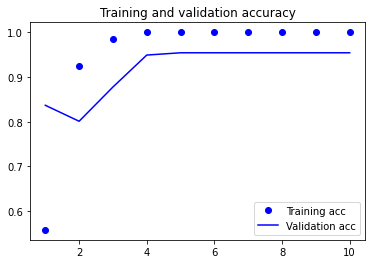

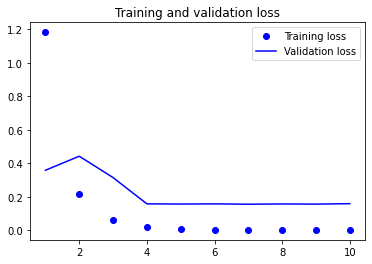

In [20]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [21]:
from sklearn.metrics import accuracy_score

## Test Accuracy
predictions = model.predict(test_X)
y_pred=[]
for i in range(len(predictions)):
  res=np.argmax(predictions[i])
  y_pred.append(res)
ypred=np.array(y_pred)

test_acc = accuracy_score(test_y, ypred)

from sklearn.metrics import precision_recall_fscore_support, roc_auc_score

precision, recall, f1score, _ = precision_recall_fscore_support(test_y, ypred, average='macro')


print("Train Accuracy:\t", acc[-1])
print("Val Accuracy:\t", val_acc[-1])
print("Test Accuracy:\t", test_acc)
print("Precision:\t", precision)
print("Recall:\t\t", recall)
print("F1 Score:\t", f1score)


Train Accuracy:	 1.0
Val Accuracy:	 0.954081654548645
Test Accuracy:	 0.8921568627450981
Precision:	 0.8918238406473701
Recall:		 0.892156862745098
F1 Score:	 0.8916928751698698
